# 1) Read Data and Shuffle

In [32]:
import pandas as pd
from sklearn.model_selection import train_test_split

# read and make data frames
df_fake = pd.read_csv('pol-fake.csv', index_col=0)
df_real = pd.read_csv('pol-real.csv', index_col=0)
# add a label 0 to fake news
df_fake['label'] = 0
# add a label 1 to real news
df_real['label'] = 1
# merge two dataset
frames = [df_fake, df_real]
merged_df = pd.concat(frames)
# shuffle the merged data frame
merged_df = merged_df.sample(frac=1)
# split train data and test data 80/20
train, test = train_test_split(merged_df, test_size=0.2)
# at this level train and test varilable is dataframe and now time to make train and test x and y
train_x = train.drop("label",axis=1)
train_y = train["label"]
test_x = test.drop("label", axis=1)
test_y = test["label"]

# 2) DecisionTreeClassifier with Gini Index

Accuracy: 0.7046979865771812
Confusion matrix: [[57 24]
 [20 48]]
Precision: [[57 24]
 [20 48]]
Recall: 0.7058823529411765
F1: 0.6857142857142857


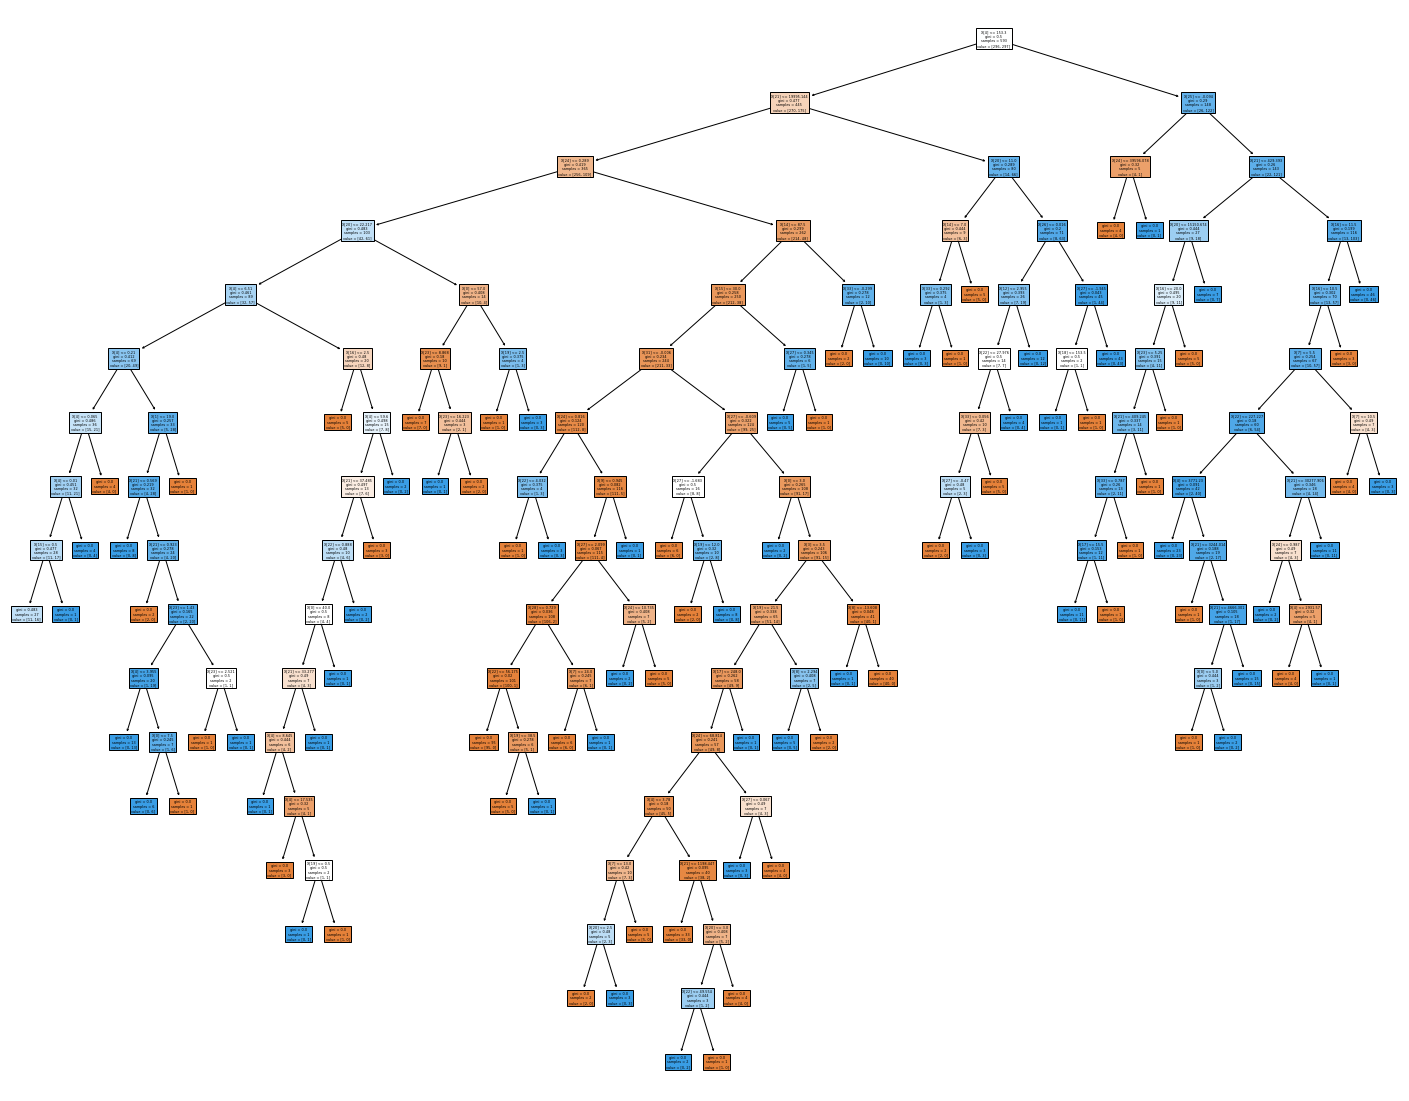

In [67]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.metrics import *
from matplotlib import pyplot as plt
# merged_df.info()
# create a classifier
clf_gini = DecisionTreeClassifier(criterion = "gini")
clf_gini_train = clf_gini.fit(train_x, train_y)
predict_y = clf_gini_train.predict(test_x)
print ("Confusion matrix:", confusion_matrix(test_y, predict_y))
print ("Accuracy:", accuracy_score(test_y, predict_y))
print ("Precision:", confusion_matrix(test_y, predict_y))
print ("Recall:", recall_score(test_y, predict_y))
print ("F1:", f1_score(test_y, predict_y))
# plot_tree(clf_gini_train, filled=True).savefig("Hello.png")
fig = plt.figure(figsize=(25,20))
_ = plot_tree(clf_gini_train, filled=True)
fig.savefig("decistion_tree_gini.png")
# predict_y

# 3) DecisionTreeClassifier with Information gain method

Accuracy: 0.6845637583892618
Confusion matrix: [[56 25]
 [22 46]]
Precision: [[56 25]
 [22 46]]
Recall: 0.6764705882352942
F1: 0.6618705035971224


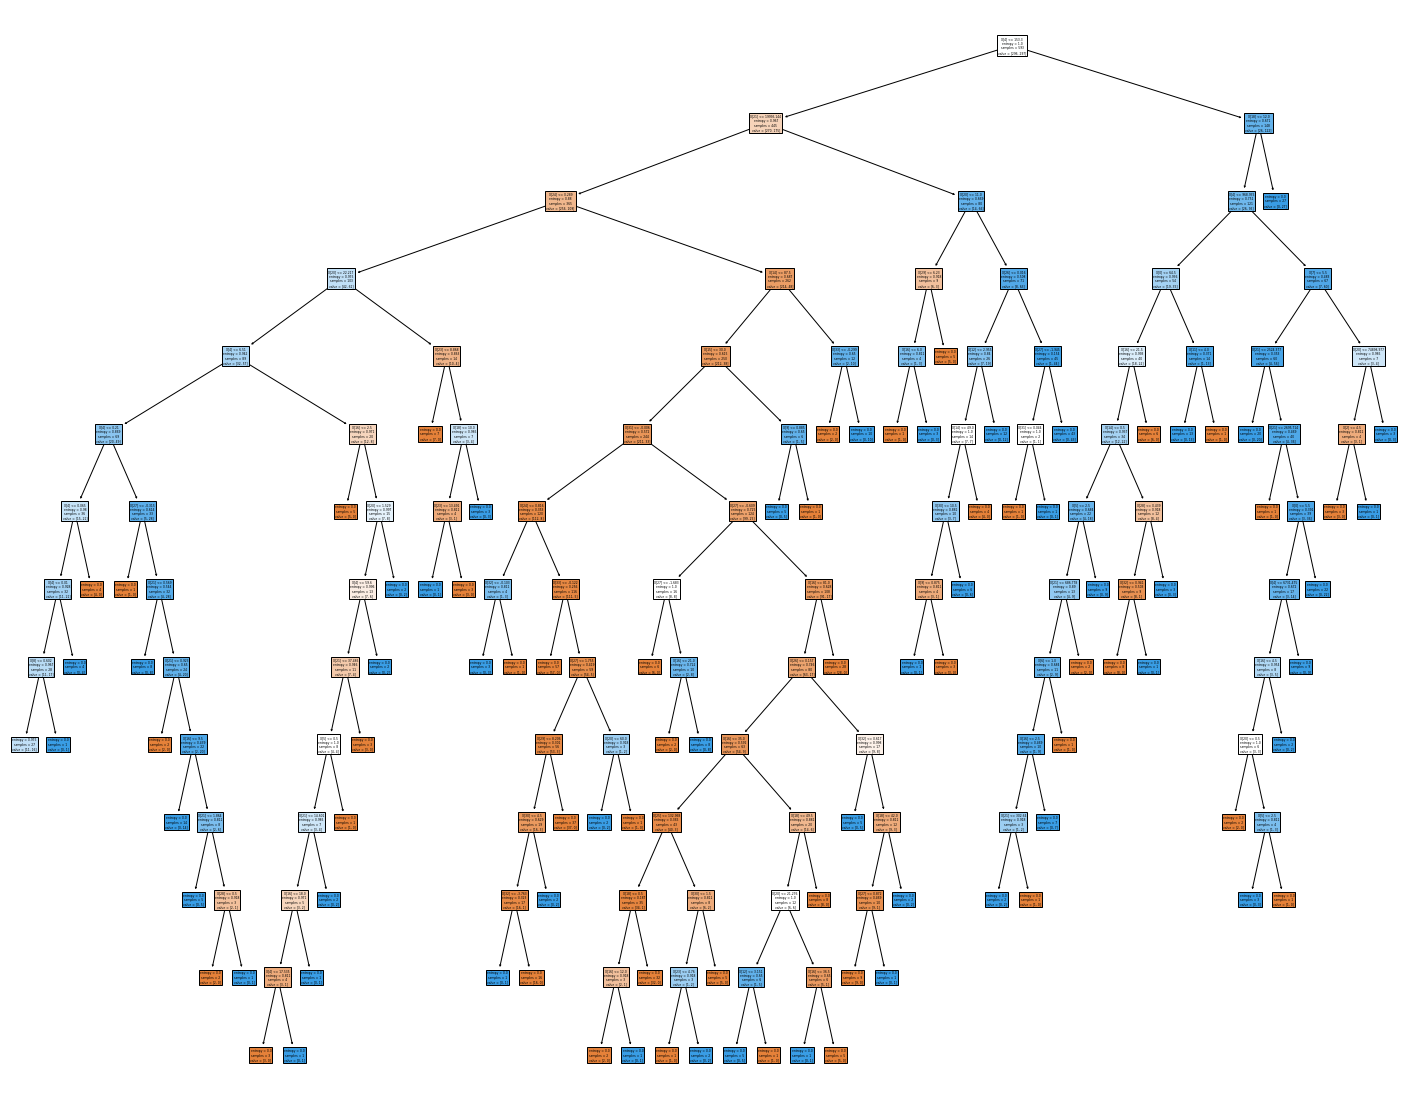

In [77]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.metrics import *
from matplotlib import pyplot as plt

clf_info_gain = DecisionTreeClassifier(criterion = "entropy")
clf_info_gain_train = clf_info_gain.fit(train_x, train_y)
predict_y = clf_info_gain_train.predict(test_x)
print ("Accuracy:", accuracy_score(test_y, predict_y))
print ("Confusion matrix:", confusion_matrix(test_y, predict_y))
print ("Precision:", confusion_matrix(test_y, predict_y))
print ("Recall:", recall_score(test_y, predict_y))
print ("F1:", f1_score(test_y, predict_y))
# plot_tree(clf_gini_train, filled=True).savefig("Hello.png")
fig = plt.figure(figsize=(25,20))
_ = plot_tree(clf_info_gain_train, filled=True)
fig.savefig("decistion_tree_info_gain.png")


# 4) Best Accuracy in range [5,20] as max depth using 10-fold cross validation

In [84]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import *
from sklearn.model_selection import cross_val_score

x_s = []
y_s = []

for i in range(5,21):
    clf = DecisionTreeClassifier(max_depth=i)
    clf_train = clf.fit(train_x, train_y)
    scores = cross_val_score(clf_gini, train_x, train_y, cv=10)
    print (i,": ", scores.mean()*100)
    x_s.append(i)
    y_s.append(scores.mean()*100)
# now we can plot the mean accuracy of differant depth
# fig = plt.figure(figsize=(25,20))
# plt.plot(x_s, y_s)

5 :  71.80790960451976
6 :  71.80790960451976
7 :  71.98587570621469
8 :  71.14406779661017
9 :  70.63276836158192
10 :  70.29378531073446
11 :  70.9858757062147
12 :  70.48022598870057
13 :  71.4858757062147
14 :  72.15819209039547
15 :  71.64406779661017
16 :  72.65254237288136
17 :  70.9689265536723
18 :  71.3050847457627
19 :  70.64406779661016
20 :  72.15536723163842


# 6) Random Forest algorithm 

In [83]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import *
from matplotlib import pyplot as plt
# create a classifier
clf_random_forest = RandomForestClassifier()
clf_random_forest_train = clf_random_forest.fit(train_x, train_y)
predict_y = clf_random_forest_train.predict(test_x)
print ("Accuracy:", accuracy_score(test_y, predict_y)*100)

Accuracy: 78.52348993288591
